In [15]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
import matplotlib.pyplot as plt
#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import seaborn as sns
sns.set()

data_path = "StartUpsESG_0602.csv"
#df é o dataframe original
df = pd.read_csv(data_path)

X = df.copy()
selected = X[['StartUp', 'Country', 'ESG', 'E', 'S', 'G', 'Raised']]
cater = selected[['StartUp', 'Country']]
numer = selected[['ESG','E','S', 'G', 'Raised']]
numer

,ESG,E,S,G,Raised
0,0.010,0.008,0.002,0.000,5986183.0
1,0.018,0.010,0.006,0.002,0.0
2,0.014,0.010,0.000,0.004,3500000.0
3,0.008,0.006,0.000,0.002,0.0
4,0.017,0.000,0.011,0.006,0.0
...,...,...,...,...,...
6536,0.000,0.000,0.000,0.000,0.0
6537,0.000,0.000,0.000,0.000,0.0
6538,0.000,0.000,0.000,0.000,0.0
6539,0.000,0.000,0.000,0.000,0.0


Text(0, 0.5, 'Raised')

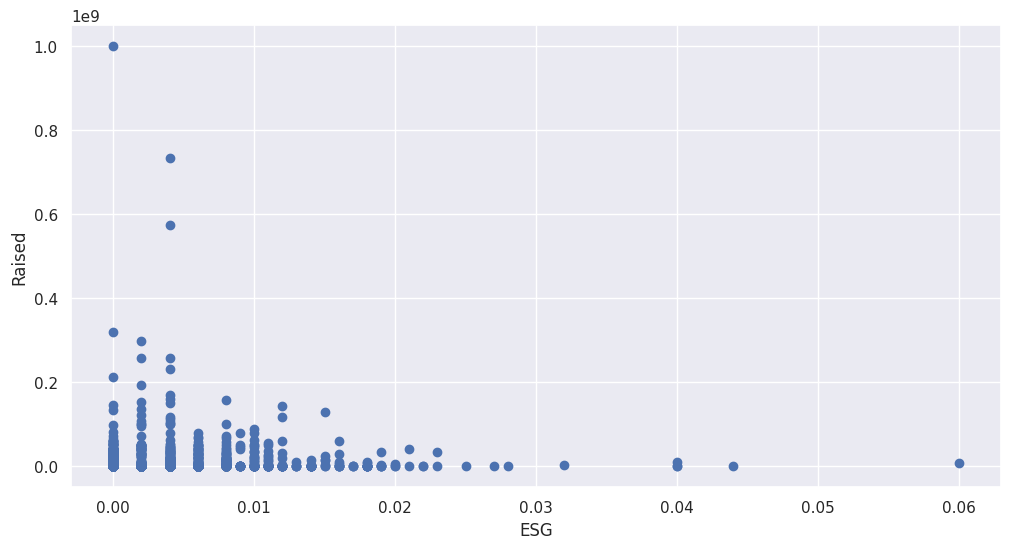

In [16]:
plt.figure(figsize = (12,6))
plt.scatter(numer[['ESG']], numer[['Raised']])
plt.xlabel("ESG")
plt.ylabel("Raised")

In [17]:
scaler = StandardScaler()
numer_scaled = pd.DataFrame(scaler.fit_transform(numer))
numer_scaled.columns = ['ESG_Scaled', 'E_Scaled', 'S_Scaled', 'G_Scaled', 'Raised_Scaled']

In [18]:
pca = PCA()
pca.fit(numer_scaled)
pca.explained_variance_ratio_

array([0.51048312, 0.20001351, 0.15542376, 0.09984247, 0.03423714])

Text(0, 0.5, 'Variancia distribuida cumulativa')

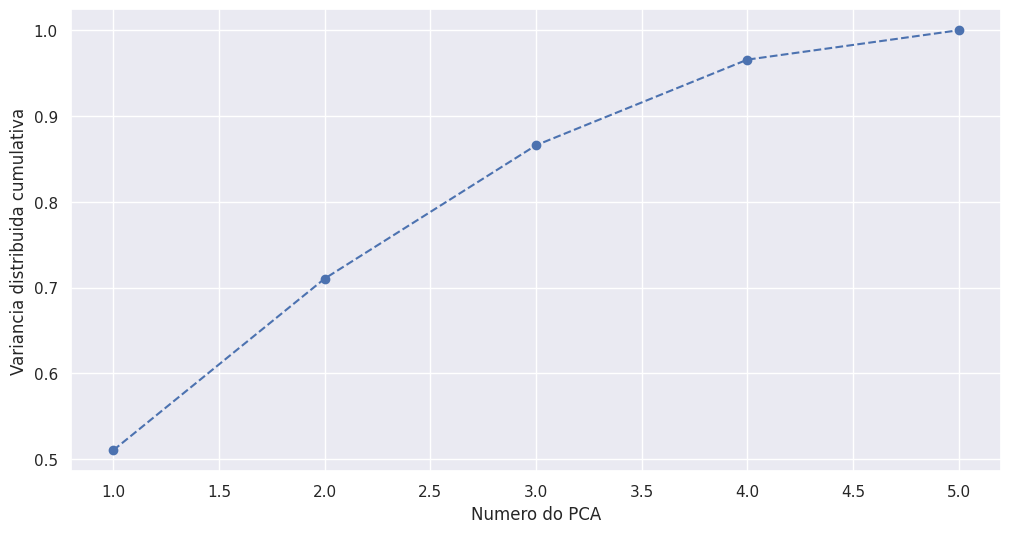

In [19]:
plt.figure(figsize = (12,6))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel("Numero do PCA")
plt.ylabel("Variancia distribuida cumulativa")

In [20]:
pca3 = PCA(n_components=3)

In [21]:
pca3.fit(numer_scaled)
print(pca3.explained_variance_ratio_)

[0.51048312 0.20001351 0.15542376]


In [22]:
scores_pca3 = pca3.transform(numer_scaled)
print(scores_pca3)

[[ 4.12138296 -1.20290623  3.47325005]
 [ 7.92675085 -1.76479074  3.20277385]
 [ 6.13820668 -1.36056234  2.25531372]
 ...
 [-0.46593263 -0.16147681  0.04651055]
 [-0.46593263 -0.16147681  0.04651055]
 [-0.46593263 -0.16147681  0.04651055]]


In [23]:
wcss3 = []
for i in range(1,21):
  kmeans_pca3 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca3.fit(scores_pca3)
  wcss3.append(kmeans_pca3.inertia_)

Text(0, 0.5, 'WCSS3')

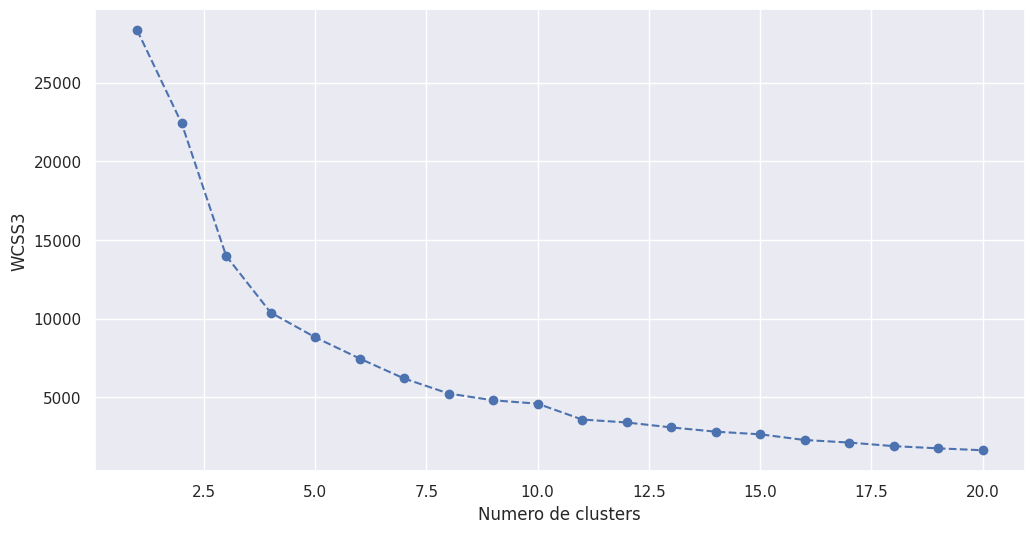

In [24]:
plt.figure(figsize = (12,6))
plt.plot(range(1,21), wcss3, marker='o', linestyle='--')
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS3")

In [25]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca3)

KMeans(n_clusters=4, random_state=42)

In [26]:
df_segm_pca_kmeans = pd.concat([numer.reset_index(drop = True), pd.DataFrame(scores_pca3)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['PC1','PC2','PC3']
df_segm_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_segm_pca_kmeans

,ESG,E,S,G,Raised,PC1,PC2,PC3,Cluster
0,0.010,0.008,0.002,0.000,5986183.0,4.121383,-1.202906,3.473250,2
1,0.018,0.010,0.006,0.002,0.0,7.926751,-1.764791,3.202774,2
2,0.014,0.010,0.000,0.004,3500000.0,6.138207,-1.360562,2.255314,2
3,0.008,0.006,0.000,0.002,0.0,3.280582,-0.996089,1.554252,2
4,0.017,0.000,0.011,0.006,0.0,7.842390,-0.083256,-3.098816,2
...,...,...,...,...,...,...,...,...,...
6536,0.000,0.000,0.000,0.000,0.0,-0.465933,-0.161477,0.046511,0
6537,0.000,0.000,0.000,0.000,0.0,-0.465933,-0.161477,0.046511,0
6538,0.000,0.000,0.000,0.000,0.0,-0.465933,-0.161477,0.046511,0
6539,0.000,0.000,0.000,0.000,0.0,-0.465933,-0.161477,0.046511,0


In [27]:
df_segm_pca_kmeans['Seg'] = df_segm_pca_kmeans['Cluster'].map({0:'C0', 1:'C1', 2:'C2', 3:'C3'})

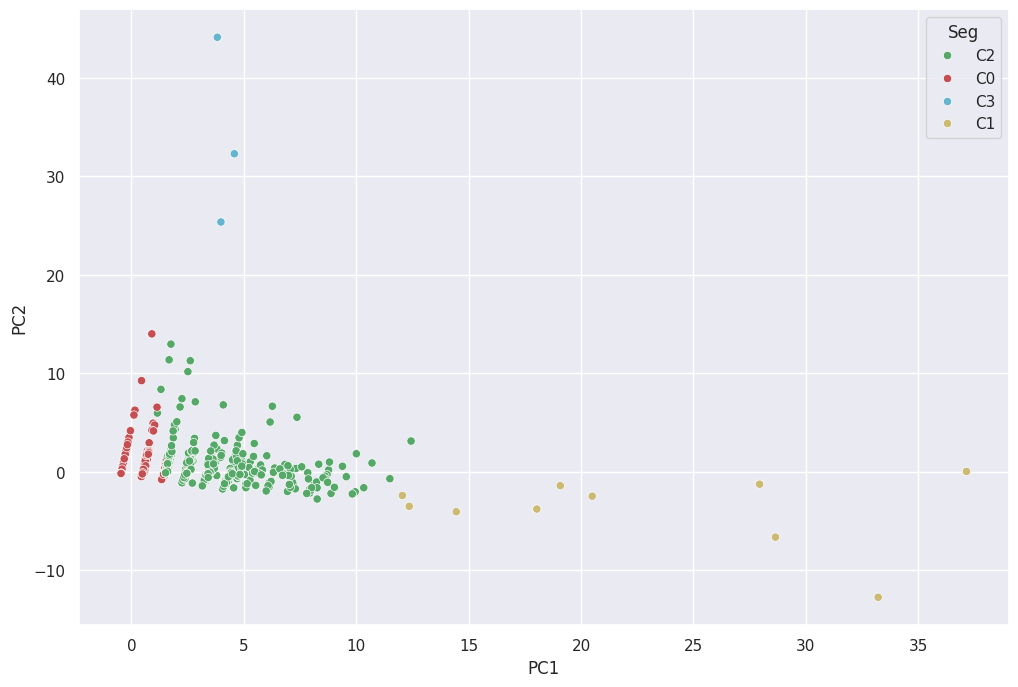

In [28]:
x_axis = df_segm_pca_kmeans['PC1']
y_axis = df_segm_pca_kmeans['PC2']
plt.figure(figsize = (12,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_pca_kmeans['Seg'], palette=['g','r','c','y'])
plt.show()